# Tarea 8.4

Considere la función $f(x) = 4 x^3 - 3x^2 + x -5$. Use sólo dos puntos para interpolar usando una spline cúbica entre $x =-1$ y $x = 1$. Haga lo mismo con 4 puntos equidistantes. Explique por qué la spline cúbica es diferente del polinomio original si ambos son polinomios cúbicos.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#Definimos la funcion que va a ser interpolada 
def f(x): 
    return 4*x**3-3*x**2+x-5

Text(0, 0.5, 'f(x)')

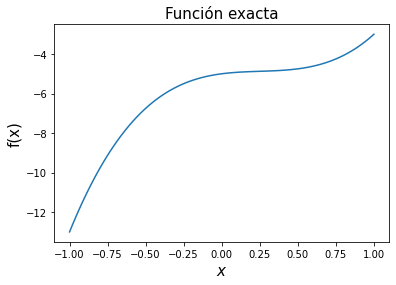

In [19]:
x = np.linspace(-1,1,100) #se muestra la forma de la función en el rango [-1,1]
#graficamos la función
plt.plot(x,f(x))
plt.title('Función exacta',size=15)
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)

In [20]:
def enc_ind(x, puntos): #función que encuentra los indices entre los puntos indicados.
    for i in range(len(puntos)):
        if x < puntos[i,0] and i != 0:
            return i-1

Para aplicar el metodo de interpolación por slipe cúbica, ademas de las condiciones ya descritas debe cumplir que ademas de coincidir los puntos entre la función exacta y el polinomio interpolado, deben coincidir la primera y la segunda derivada para que la curva le de continuidad a la función, tal como lo vimos en clase debe quedar de la forma: 

$$ 
S_{i}'(x_{i+1}) = S_{i+1}'(x_{i+1})
$$

$$
S_{i}''(x_{i+1}) = S_{i+1}''(x_{i+1})
$$

$$
S_0''(x_o) = S_{n-1}''(x_n) = 0
$$

In [21]:
def spline_coefs(puntos): #definimos la spline que usaremos 
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a[i+1] - a[i]) - (3/h[i-1])*(a[i] - a[i-1])
        
        
    # Se resuelve un sistema de ecuaciones:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    b = np.zeros(n)
    c = np.zeros(n+1)
    d = np.zeros(n)
    for j in range(n-1,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    return a, b, c, d

In [22]:
#Se evaluan los coeficientes encontrados para hallar la spline cúbica (polinomio de orden 3) 
#usamos la siguiente función:

def spline_eval(x, coefs, puntos):

    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = enc_ind(x, puntos)
    a, b, c, d = coefs
    return (a[i] + b[i]*(x - puntos[i][0]) + \
            c[i]*(x - puntos[i][0])**2 + d[i]*(x - puntos[i][0])**3)

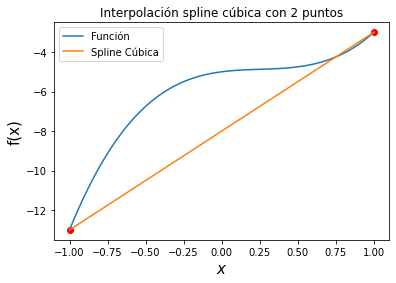

In [23]:
#Aplicamos el metodo y evaluamos la funcion definida en el ejercicio f(x)
orden1 = 2

xp = np.linspace(-1, 1, orden1)
puntos = np.array([[xi, f(xi)] for xi in xp])
coefs= spline_coefs(puntos)

x = np.linspace(-1, 1, 100)
funcion = f(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, funcion, label='Función')
plt.plot(x, spline, label='Spline Cúbica')
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)
plt.title('Interpolación spline cúbica con 2 puntos')
plt.legend()

Con 2 puntos la spline cubica no tiene una muy buena aproximacion, por lo que intentamos hacerlo con 4 puntos.

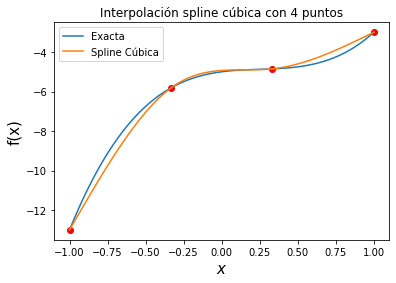

In [24]:
orden2 = 4
#Graficamos ambas funciones para compararlas(exacta, spline cúbica) con los 4 puntos

xp = np.linspace(-1, 1, orden2)
puntos = np.array([[xi, f(xi)] for xi in xp])
coefs= spline_coefs(puntos)

x = np.linspace(-1, 1, 100)
funcion = f(x)
spline = [spline_eval(xi, coefs, puntos) for xi in x]

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, funcion, label='Exacta')
plt.plot(x, spline, label='Spline Cúbica')
plt.xlabel('$x$',size=15)
plt.ylabel('f(x)',size=15)
plt.title('Interpolación spline cúbica con 4 puntos')
plt.legend()

Finalmente podemos decir que con 4 puntos equidistantes, la interpolación se ajusta mucho mejor a la curva real de la función. Además podemos decir que los resultados tienen una pequeña diferencia debido a que la función es de oren alto y evaluamos toda la función de una, si por el contrario hubieramos evaluado la funcion por tramo quizas el error se hubiera disminuido aún mas.
Otro error que se puede analizar es que aveces lospuntos de los datos tienen pequeños errores numericos y por esto también se presenta cierta diferencia al graficar. 